# Exemplos de ajuste sináptico - aprendizado

In [15]:
# base

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

Supondo f(x)=x,

y = w1.x1 + w2.x2 - b

fazendo y=0 e reescrevendo para x2 em termos de x1,

x2 = -(w1/w2).x1 +b/w2

facendo w0 = -b,

In [16]:
# base

# função para traçar reta
def coord(w0,w1,w2,x1):
  if w2 != 0:
    return (-w0-w1*x1)/w2
  else:
    return 2000 # Inf

# Experimentos clássicos com o Perceptron / ADALINE / Regra de Hebb

Escolha um dos datasets:

In [17]:

# dataset Iris
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

# setosa e versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# comps sepal e petal
X = df.iloc[0:100, [0,2]].values


In [18]:
# # dataset porta lógica AND
# X = np.array([[-1,-1],[-1,1],[1,-1],[1,1]])
# y = np.array([-1,-1,-1,1])

In [19]:
# confere entrada - saída
X[0:4], y[0:4]

(array([[5.1, 1.4],
        [4.9, 1.4],
        [4.7, 1.3],
        [4.6, 1.5]]),
 array([-1, -1, -1, -1]))

## Cria objeto Perceptron e escolhe parâmetros do treinamento (épocas e taxa de aprendizado):

In [20]:
# base
# classe Perceptron

class Perceptron(object):

    def __init__(self, eta=0.1, epocas=50):
        self.eta = eta
        self.epocas = epocas
        self.w_ = np.random.rand(1 + X.shape[1]) - 0.5

    def treina(self, X, y):
        self.erros_ = []
        for _ in range(self.epocas):
            erros = 0
            for xi, target in zip(X, y):

                # atualizacao PERCEPTRON classico
                #atualiza = self.eta * (target - self.predict(xi))

                # atualizacao abordagem ADALINE
                atualiza = self.eta * (target - self.somat(xi))

                self.w_[0] +=  atualiza * 1
                self.w_[1:] +=  atualiza * xi

                # erros PERCEPTRON
                #erros += int(atualiza != 0.0)

                # erros ADALINE
                erros += (target - self.somat(xi))

            self.erros_.append(erros)
        return self

    # supondo que cada entrada fosse outro neurônio
    def treinaHebb(self, X, y):
        self.erros_ = []
        for _ in range(self.epocas):
            erros = 0
            for xi, target in zip(X, y):

                # atualizacao PERCEPTRON - somente mesmo sinal
                if (target * self.somat(xi)) > 0:
                    atualiza = self.eta
                else:
                    atualiza = 0

                self.w_[0] +=  atualiza * 1
                self.w_[1:] +=  atualiza * xi

                # erros PERCEPTRON
                erros += int(atualiza != 0.0)

            self.erros_.append(erros)
        return self

    def somat(self, X):
        return self.w_[0] + np.dot(X, self.w_[1:])

    def predict(self, X):
        return np.where(self.somat(X) >= 0.0, 1, -1)

In [21]:
# cria objeto 'rna' : um neurônio Perceptron
rna = Perceptron(epocas=20, eta=0.1)

Pesos iniciais: [ 0.25340841 -0.05683421 -0.1982434 ]


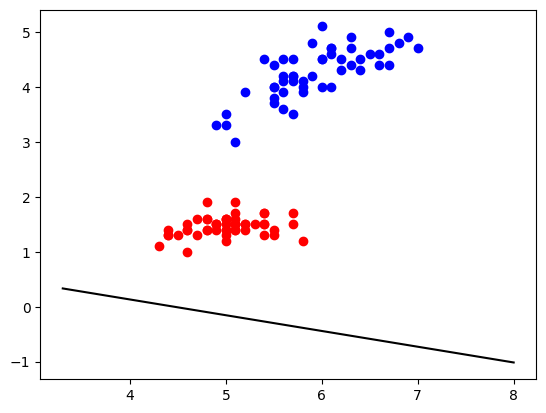

In [22]:
# mostra o classificador antes do treinamento
print(f'Pesos iniciais: {rna.w_}')
x1, y1 = X[y==1,0],X[y==1,1]
x0, y0 = X[y==-1,0], X[y==-1,1]

ylim = [min(min(x1) , min(x0))-1, max(max(x0) , max(x1))+1]
x = np.linspace(ylim[0], ylim[1], 2)
plt.scatter(x1,y1, color='blue')
plt.scatter(x0,y0,color='red')
plt.plot(ylim,coord(rna.w_[0],rna.w_[1],rna.w_[2], x),color='black')
plt.show()

In [23]:
# testa/executa o neurônio : entrada -> saída
rna.predict([5,1.5]), rna.predict([6,4])

(array(-1), array(-1))

## Escolhe um tipo de treinamento:

- a seleção da atualização (Perceptron clássica ou ADALINE) pode ser ajustada com 'comentários' partes do código na declaração do objeto.

In [24]:
# treina o neurônio
#rna.treina(X, y)
rna.treinaHebb(X, y)

In [25]:
print(f'Pesos depois treinamento: {rna.w_}')

Pesos depois treinamento: [100.35340841 594.05316579 425.9417566 ]


Análise dos resultados do treinamento (evolução do erro e visualização do classificador linear resultante)

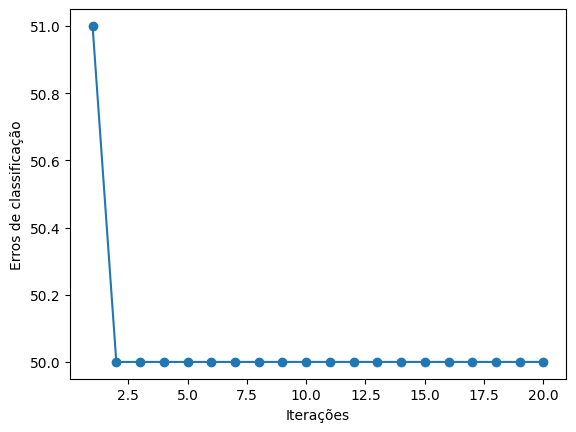

In [26]:
# evolução do erro
plt.plot(range(1, len(rna.erros_)+1), rna.erros_, marker='o')
plt.xlabel('Iterações')
plt.ylabel('Erros de classificação')
plt.show()

Pesos depois treinamento [w0, w1,w2]: [100.35340841 594.05316579 425.9417566 ]


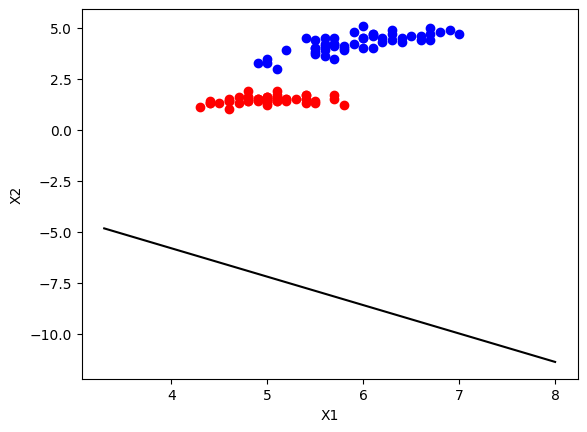

In [27]:
print(f'Pesos depois treinamento [w0, w1,w2]: {rna.w_}')
x1, y1 = X[y==1,0],X[y==1,1]
x0, y0 = X[y==-1,0], X[y==-1,1]

ylim = [min(min(x1) , min(x0))-1, max(max(x0) , max(x1))+1]
x = np.linspace(ylim[0], ylim[1], 2)
plt.scatter(x1,y1, color='blue')
plt.scatter(x0,y0,color='red')
plt.plot(ylim,coord(rna.w_[0],rna.w_[1],rna.w_[2], x),color='black')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [28]:
# lembrem-se que, a qualquer momento, vcs podem verificar os valores atuais de uma dada variável
rna.erros_

[51,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50]

## Atividade 03: Testando e entendendo os tipos de aprendizado e seus parâmetros

1) Para o dataset da porta lógica AND, verifique e compare os resultados obtidos usando:

*   o neurônio Perceptron com a regra de correção Delta (usando a saída do Perceptron para cálculo do erro)
*  e o ADALINE que utiliza a somatória das estradas ponderadas como base para o ajuste dos pesos sinápticos.
*   Verifique como a quantidade de épocas e a taxa de aprendizado (eta) influenciam no treinamento e no resultado
*   Verifique, se for o caso, sob quais condições a regra de Hebb - método treinaHebb() - pode ser usada no aprendizado do Perceptron neste dataset

2) Para o dataset da Iris (entradas: comprimentos da sépala e pétala - colunas 0 e 2), verifique e compare os resultados obtidos usando:

*    o neurônio Perceptron com a regra de correção Delta (usando a saída do Perceptron para cálculo do erro)
*  e o ADALINE que utiliza a somatória das estradas ponderadas como base para o ajuste dos pesos sinápticos.
*   Verifique como a quantidade de épocas e a taxa de aprendizado (eta) influenciam no treinamento e resultado
*   Verifique, se for o caso, sob quais condições a regra de Hebb pode ser usada no aprendizado do Perceptron neste dataset

.

**Prepare um relatório (Atividade 03 - para entregar) que apresenta os resultados dos testes e as conclusões.**
